In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [2]:
n = np.max(data['to'])
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = 1 #+=1

In [3]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


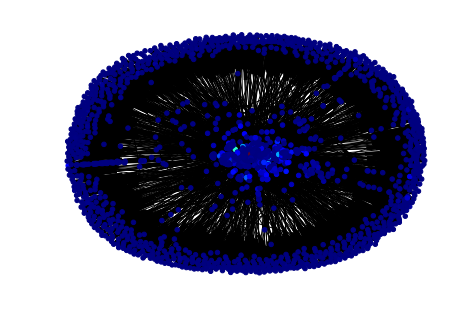

In [21]:
pos = nx.spring_layout(G)
degree = G.degree()
nodes = G.nodes()
n_color = np.asarray([degree[n] for n in nodes])
nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
plt.show()

# 1. Random graph generator

In [43]:
in_degree = np.mean(list(G.in_degree().values()))
out_degree = np.mean(list(G.out_degree().values()))
print(in_degree)
print(out_degree)
total_degree = G.in_degree()
mean_degree = np.mean(list(total_degree.values()))
p = mean_degree/(n-1)
print("Expected degree: {}".format(mean_degree))
print("n: {}".format(n))
print("p: {}".format(p))
R = nx.erdos_renyi_graph(n,p,directed=True)

2.75899457861
2.75899457861
Expected degree: 2.7589945786101526
n: 1833
p: 0.001506001407538293


In [44]:
a = nx.degree_assortativity_coefficient(G)
print("Assortativity of our graph: {}".format(a))
b = nx.degree_assortativity_coefficient(R)
print("Assortativity of random generated graph: {}".format(b))

Assortativity of our graph: -0.3029374827993258
Assortativity of random generated graph: 0.008811218691793537


C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


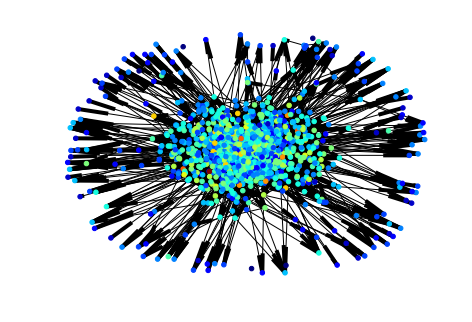

In [45]:
pos = nx.spring_layout(R)
degree = R.degree()
nodes = R.nodes()
n_color = np.asarray([degree[n] for n in nodes])
nx.draw(R, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
plt.show()

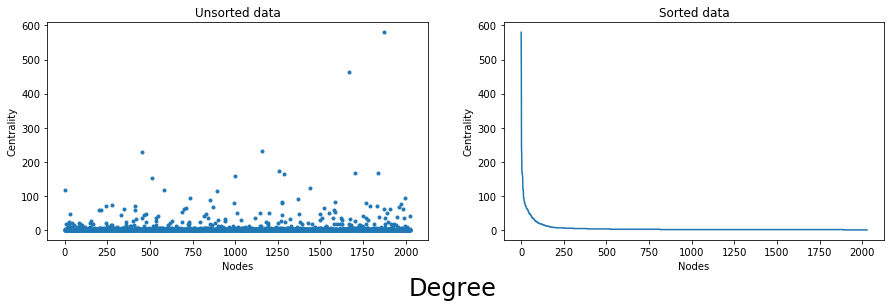

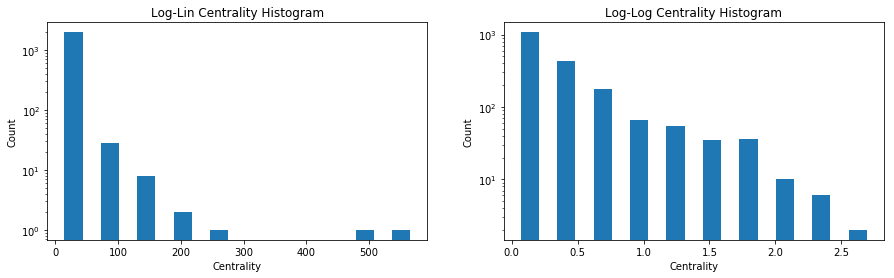

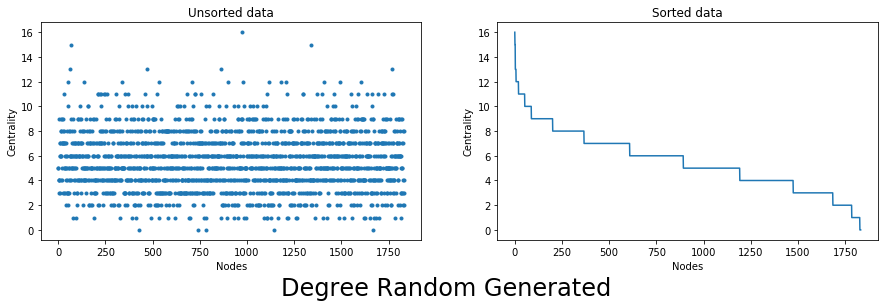

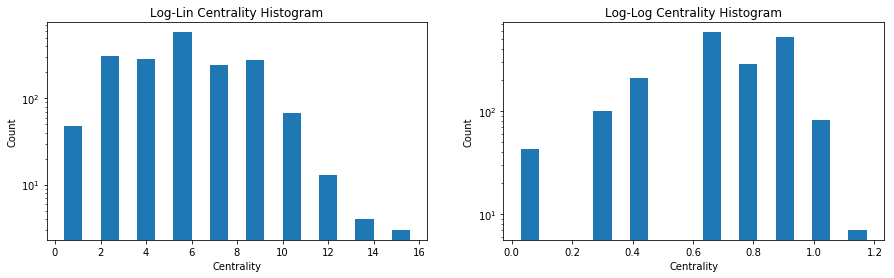

In [46]:
def plot_dic(dic, name):
    vals = np.array(list(dic.values()))
    plt.figure(figsize=(15,4))
    plt.suptitle(name, fontsize=24,y=0)
    plt.subplot(1,2,1)
    plt.plot(vals, '.')
    plt.title("Unsorted data");plt.ylabel("Centrality");plt.xlabel("Nodes")
    plt.subplot(1,2,2)
    plt.plot(sorted(vals, reverse=True))
    plt.title("Sorted data");plt.ylabel("Centrality");plt.xlabel("Nodes")
    plt.show()
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(vals, log=True, rwidth=0.5)
    plt.title("Log-Lin Centrality Histogram");plt.ylabel("Count");plt.xlabel("Centrality")
    plt.subplot(1,2,2)
    pos_vals = vals[vals > 0]
    plt.hist(np.log10(pos_vals), log=True, rwidth=0.5)
    plt.title("Log-Log Centrality Histogram");plt.ylabel("Count");plt.xlabel("Centrality")
    plt.show()
    
degree = nx.degree(G)
plot_dic(degree,'Degree')

degree = nx.degree(R)
plot_dic(degree,'Degree Random Generated')